In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [52]:
#Importing Libraries and important functions

from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [53]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/validation'

In [54]:
train_image_paths = []
train_labels = []
test_image_paths = []
test_labels = []

for label in os.listdir(TRAIN_DIR):
    label_dir = os.path.join(TRAIN_DIR, label)
    if os.path.isdir(label_dir):
        for imagename in os.listdir(label_dir):
            train_image_path = os.path.join(label_dir, imagename)
            train_image_paths.append(train_image_path)
            train_labels.append(label)
        print(label, "completed")
        
print("")
        
for label in os.listdir(TEST_DIR):
    label_dir = os.path.join(TEST_DIR, label)
    if os.path.isdir(label_dir):
        for imagename in os.listdir(label_dir):
            test_image_path = os.path.join(label_dir, imagename)
            test_image_paths.append(test_image_path)
            test_labels.append(label)
        print(label, "completed")

        
train = pd.DataFrame({
    'image': train_image_paths,
    'label': train_labels
})

test = pd.DataFrame({
    'image': test_image_paths,
    'label': test_labels
})

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [55]:
print(train)
print(test)

                                                   image     label
0      /kaggle/input/face-expression-recognition-data...  surprise
1      /kaggle/input/face-expression-recognition-data...  surprise
2      /kaggle/input/face-expression-recognition-data...  surprise
3      /kaggle/input/face-expression-recognition-data...  surprise
4      /kaggle/input/face-expression-recognition-data...  surprise
...                                                  ...       ...
28816  /kaggle/input/face-expression-recognition-data...     happy
28817  /kaggle/input/face-expression-recognition-data...     happy
28818  /kaggle/input/face-expression-recognition-data...     happy
28819  /kaggle/input/face-expression-recognition-data...     happy
28820  /kaggle/input/face-expression-recognition-data...     happy

[28821 rows x 2 columns]
                                                  image     label
0     /kaggle/input/face-expression-recognition-data...  surprise
1     /kaggle/input/face-expression-re

In [56]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [57]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [58]:
x_train = train_features/255.0
x_test = test_features/255.0

In [59]:
le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [60]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [61]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [63]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test))


Epoch 1/200
  4/226 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.1476 - loss: 1.9667

W0000 00:00:1721700375.505870     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2277 - loss: 1.8406

W0000 00:00:1721700393.211294     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


226/226 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.2278 - loss: 1.8405 - val_accuracy: 0.2583 - val_loss: 1.8104
Epoch 2/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.2456 - loss: 1.8161 - val_accuracy: 0.2596 - val_loss: 1.8045
Epoch 3/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.2560 - loss: 1.7930 - val_accuracy: 0.2952 - val_loss: 1.7079
Epoch 4/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.2908 - loss: 1.7183 - val_accuracy: 0.3803 - val_loss: 1.5890
Epoch 5/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.3655 - loss: 1.5996 - val_accuracy: 0.4408 - val_loss: 1.4489
Epoch 6/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.4102 - loss: 1.5196 - val_accuracy: 0.4751 - val_loss: 1.3653
Epoch 7/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.4379 - loss: 1.4565 - val_accuracy: 0.5010 - val_loss: 1.3056
Epoch 8/200
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.4591 - loss: 1.4085 - val_accura

In [64]:
model_json = model.to_json()
with open("emotiondetector_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector_model.h5")

In [65]:
# Save the complete model
model.save("/kaggle/working/emotiondetector_model.h5")

In [66]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [67]:
def ef(image_path):
    img = load_img(image_path, color_mode="grayscale", target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
model prediction is  fear


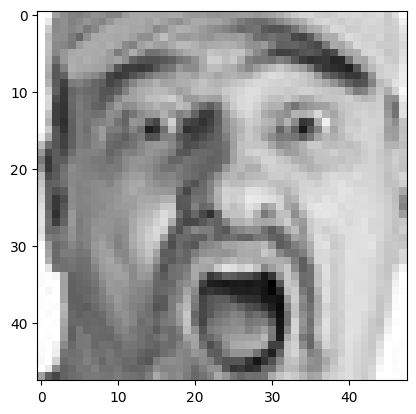

In [69]:
image = '/kaggle/input/face-expression-recognition-dataset/images/train/fear/10012.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


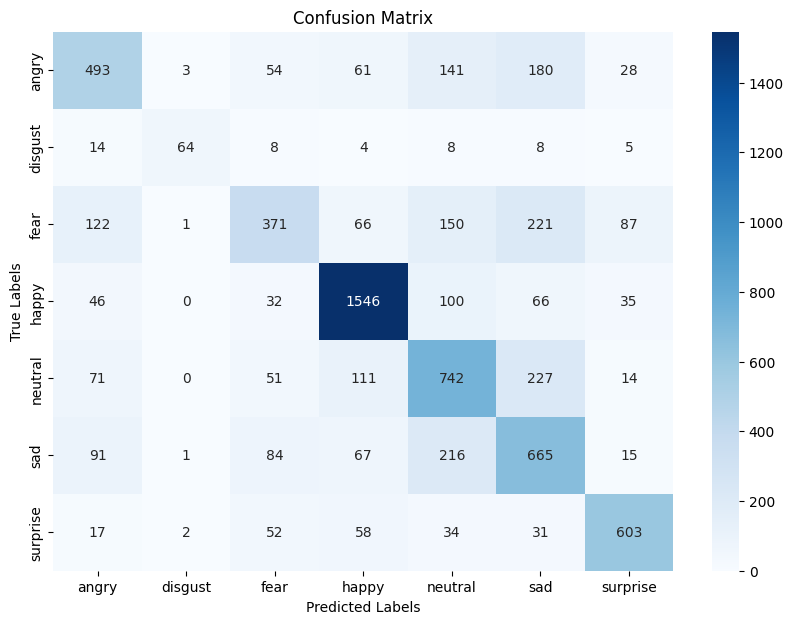

Classification Report:
              precision    recall  f1-score   support

       angry       0.58      0.51      0.54       960
     disgust       0.90      0.58      0.70       111
        fear       0.57      0.36      0.44      1018
       happy       0.81      0.85      0.83      1825
     neutral       0.53      0.61      0.57      1216
         sad       0.48      0.58      0.52      1139
    surprise       0.77      0.76      0.76       797

    accuracy                           0.63      7066
   macro avg       0.66      0.61      0.62      7066
weighted avg       0.64      0.63      0.63      7066



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the model
from keras.models import load_model
model = load_model("emotiondetector_model.h5")

# Predict on the test set
y_pred = model.predict(x_test)

# Get the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=label)
print("Classification Report:")
print(report)


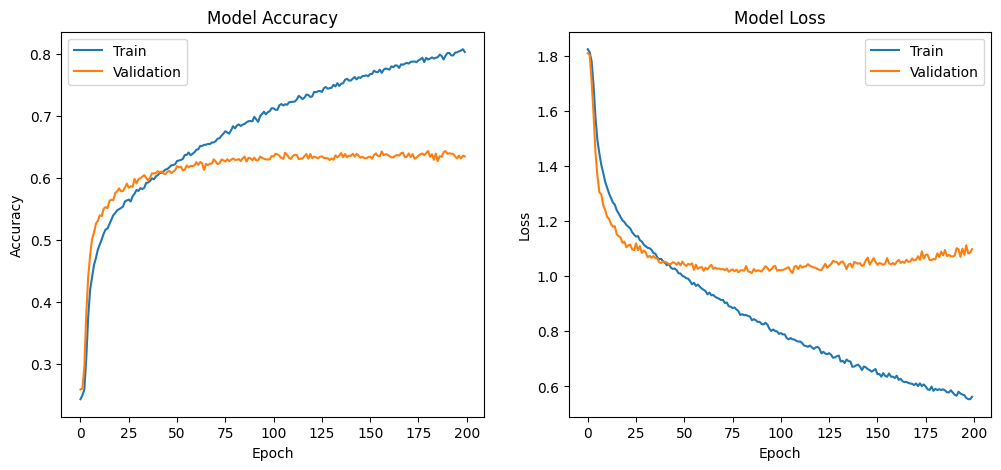

In [71]:
# history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
